In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
import os
my_path = './dataset'
print(os.listdir("./dataset"))

/Users/keke87cc/.pyenv/versions/3.7.9/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


['housing.csv', 'corr2_plot.png', 'housing_prices_scatterplot.png', 'ols_train MSE.png', 'ols_test_MSE.png', 'gd_train_MSE.png', 'corr_plot.png', 'lr_test_MSE.png', 'lr_train_MSE.png', 'corr1_plot.png', 'gd_test_MSE.png']


In [2]:
house = pd.read_csv('./dataset/housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


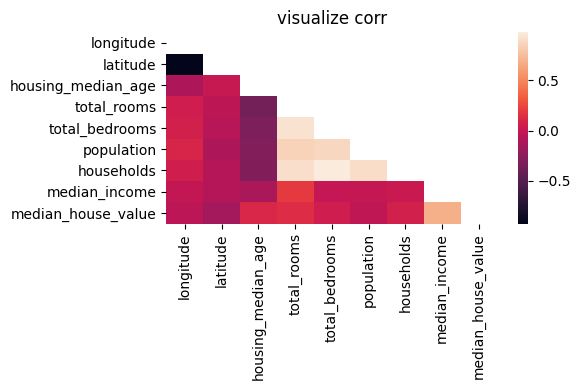

In [3]:
import seaborn as sns
corr = house.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(dpi=100)
plt.title("visualize corr")
sns.heatmap(corr, mask=mask, annot= False,lw=0, linecolor='white', fmt = "0.2f")
plt.tight_layout()
plt.savefig(my_path + "/corr_plot.png")

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [6]:
median = house['total_bedrooms'].median()
house['total_bedrooms'].fillna(median, inplace = True)
house.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [7]:
house['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
house_cat = house[['ocean_proximity']]
cat_encoder = OneHotEncoder(sparse=False)
house_cat_1hot = cat_encoder.fit_transform(house_cat)
house_cat_1hot.shape


(20640, 5)

In [9]:
type(house_cat_1hot)
df = pd.DataFrame(house_cat_1hot, columns = ['op1', 'op2', 'op3', 'op4', 'op5'], dtype = int)
df

,op1,op2,op3,op4,op5
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [10]:
house = pd.concat([house, df], axis = 1)
house = house.drop(['ocean_proximity'], axis = 1)

house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op1,op2,op3,op4,op5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [11]:
#house["rooms_per_household"] = house["total_rooms"]/house["households"]
#house["bedrooms_per_room"] = house["total_bedrooms"]/house["total_rooms"]
#house["population_per_household"]=house["population"]/house["households"]

/Users/keke87cc/.pyenv/versions/3.7.9/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


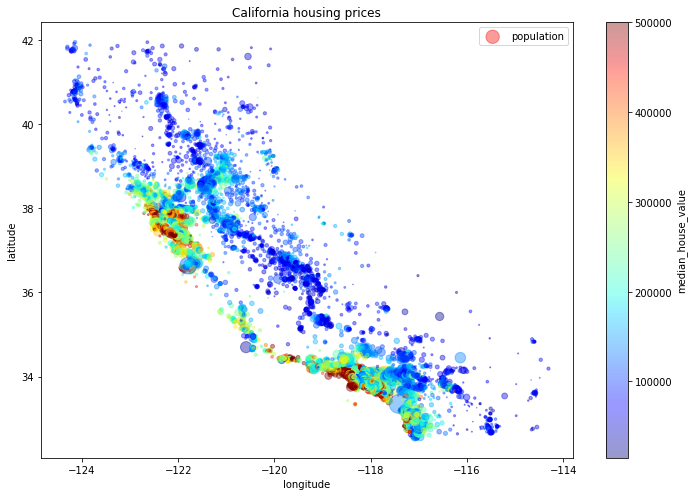

In [12]:
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=house["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('California housing prices')
plt.legend()
plt.tight_layout()
plt.savefig(my_path + "/housing_prices_scatterplot.png")

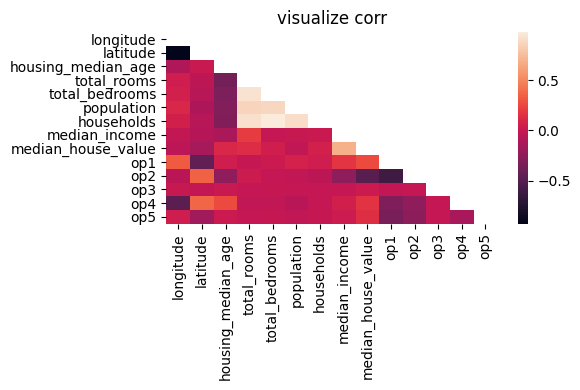

In [13]:
corr = house.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(dpi=100)
plt.title('visualize corr')
sns.heatmap(corr, mask=mask, annot= False,lw=0, linecolor='white', fmt = "0.1f")
plt.tight_layout()
plt.savefig(my_path + "/corr1_plot.png")

In [14]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
op1                   0.256617
op4                   0.160284
op5                   0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
op3                   0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
op2                  -0.484859
Name: median_house_value, dtype: float64

In [15]:
house['median_income-s2'] = house['median_income']**2
house['median_income-s3'] = house['median_income']**3
house['median_income-s4'] = house['median_income']**4
house['median_income-sq'] = np.sqrt(house['median_income'])

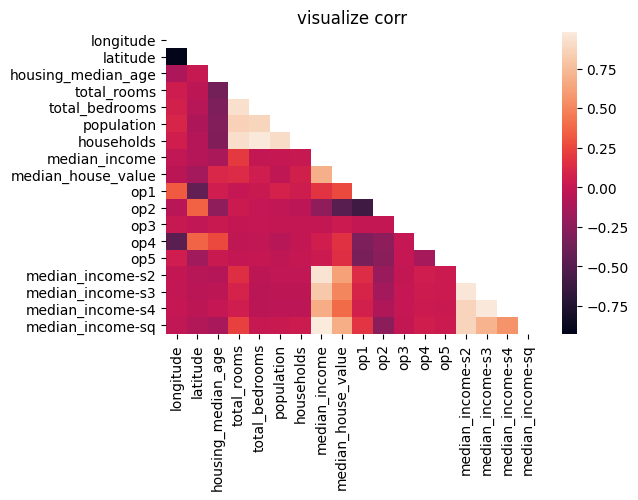

In [16]:
corr = house.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(dpi=100)
plt.title('visualize corr')
sns.heatmap(corr, mask=mask, annot= False,lw=0, linecolor='white', fmt = "0.1f")
plt.savefig(my_path + "/corr2_plot.png" , bbox_inches = "tight")

In [17]:
y = house['median_house_value']
house = house.drop(['median_house_value'], axis = 1)
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   op1                 20640 non-null  int64  
 9   op2                 20640 non-null  int64  
 10  op3                 20640 non-null  int64  
 11  op4                 20640 non-null  int64  
 12  op5                 20640 non-null  int64  
 13  median_income-s2    20640 non-null  float64
 14  median_income-s3    20640 non-null  float64
 15  median_income-s4    20640 non-null  float64
 16  medi

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(house)
housing_data = scaler.transform(house)

In [19]:
full_data = housing_data
print(full_data.shape)

(20640, 17)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_data, y, test_size=0.2, random_state = 42)

In [21]:
print(type(X_train))
print(type(y_test))
print(y_test)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64


In [22]:
def SeriestoArray(x):
    x = np.asarray(x)
    x = np.reshape(x, (-1, 1))
    print(type(x))
    return x

In [23]:
y_train=SeriestoArray(y_train)
y_test=SeriestoArray(y_test)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
def plot2a(x,y):
    x = pd.DataFrame(x, columns = ['real_value'] )
    y = pd.DataFrame(y, columns = ['predict_value'] )
    draw = pd.concat([x, y], axis = 1)
    draw.plot(kind="scatter", x = 'real_value', y = 'predict_value')
    plt.xlim(-200000, 600000)
    plt.ylim(-200000, 600000)
    plt.axline((-100000, -100000), (100000, 100000),color = 'red')

In [25]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

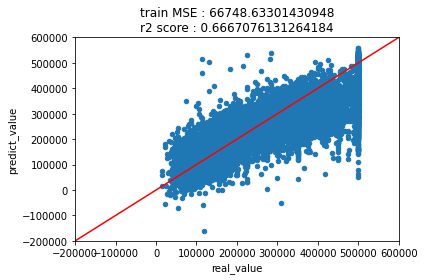

In [26]:
y_pred = linreg.predict(X_train)
plot2a(y_train, y_pred)
r2 = (linreg.score(X_train, y_train))
plt.title("train MSE : " + str(np.sqrt(metrics.mean_squared_error(y_train, y_pred))) + "\n" + "r2 score : " + str(r2))
plt.tight_layout()
plt.savefig(my_path + "/lr_train_MSE.png")

69383.84557849505


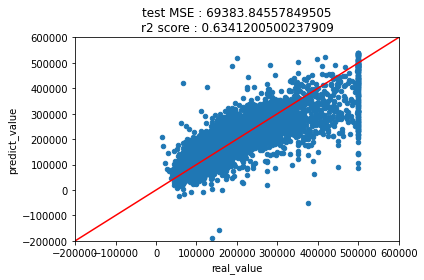

In [27]:
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plot2a(y_test, y_pred)
linreg.fit(y_test, y_pred)
r2 = linreg.score(y_test, y_pred)

plt.title("test MSE : " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) + "\n" + "r2 score : " + str(r2))
plt.tight_layout()
plt.savefig(my_path + "/lr_test_MSE.png")

In [28]:
z = np.zeros((X_train.shape[0],1))+1
X_train = np.append(z, X_train, axis=1)
print(X_train.shape)
z = np.zeros((X_test.shape[0],1))+1
X_test = np.append(z, X_test, axis=1)

(16512, 18)


In [29]:
def get_best(X, y):  
    #best_data=numpy.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
    best_data = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
    return best_data # returns a list 

In [30]:
res = get_best(X_train, y_train)

66832.46847339196


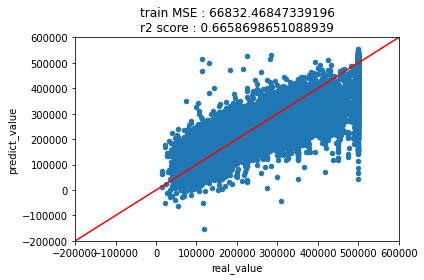

In [31]:
y_pred = X_train.dot(res)
r2 = metrics.r2_score(y_train, y_pred)
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
plot2a(y_train, y_pred)

plt.title("train MSE : " + str(np.sqrt(metrics.mean_squared_error(y_train, y_pred)))+ "\n" + "r2 score : " + str(r2) )
plt.tight_layout()
plt.savefig(my_path + "/ols_train MSE.png")

69269.13036605524


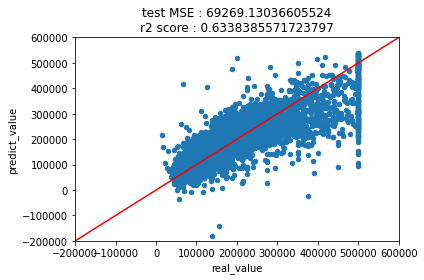

In [32]:
y_pred = X_test.dot(res)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = metrics.r2_score(y_test, y_pred)
plot2a(y_test, y_pred)
plt.title("test MSE : " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))+ "\n" + "r2 score : " + str(r2))

plt.tight_layout()
plt.savefig(my_path + "/ols_test_MSE.png")

In [33]:
print(type(y_train))
y_train.shape

<class 'numpy.ndarray'>


(16512, 1)

In [34]:
# GradientDescent function

def GradientDescent(X, y, rate, theta, itra):
    m = y.shape[0]
    for i in range(itra):
       # print(y_train)
        error =(np.matmul(X,(theta.T))-y)
        #print(error)
        gradient = np.matmul(X.T,(error))
        
        theta = theta - (rate/m) *(gradient.T)
    
    return theta

In [35]:
column=X_train.shape[1]
print(X_train.shape[1])

18


In [36]:
theta = np.matrix([0 for x in range (column)])
print((np.matmul(X_train,(theta.T))))
print((np.matmul(X_train,(theta.T))).shape)
print(type((np.matmul(X_train,(theta.T)))))

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(16512, 1)
<class 'numpy.matrix'>


In [37]:
theta = np.matrix([0 for x in range(column)])
training_rate = 0.09
itra = 1000
res = GradientDescent(X_train, y_train,training_rate,theta,itra)
res

matrix([[206625.97199753, -47225.05057774, -47415.2679429 ,
          15147.97763823, -20331.63008657,  45217.18249902,
         -42948.06788184,  23209.52740259,  45433.82317207,
           6450.74039174, -12934.19037688,   2423.66688289,
           2330.30175659,   6110.38493263,  63991.08597293,
          11632.82057094, -50815.77287053,  -3793.73458344]])

66905.15081809234


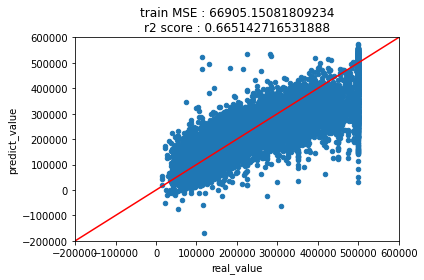

In [38]:
# Train MSE and diagram

y_train_pred = X_train.dot(res.T)
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
r2 = metrics.r2_score(y_train, y_train_pred)

plot2a(y_train, y_train_pred)

plt.title("train MSE : " + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))+ "\n" + "r2 score : " + str(r2))
plt.tight_layout()
plt.savefig(my_path + "/gd_train_MSE.png")


69138.42090679181


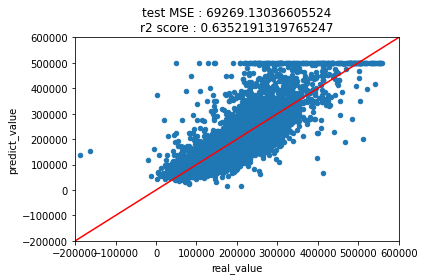

In [39]:
# Test MSE and diagram

y_test_pred = X_test.dot(res.T)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
plot2a(y_test_pred, y_test)
r2 = metrics.r2_score(y_test, y_test_pred)

plt.title("test MSE : " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) + "\n" + "r2 score : " + str(r2) )
plt.tight_layout()
plt.savefig(my_path + "/gd_test_MSE.png")